# exercise 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#open file of snps and put in data frame 
df_rpkms = pd.read_csv("/Users/cmdb/Downloads/matrix_1kg.txt",
                       sep = "\t")
df_rpkms

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#pull out alleles in the human samples, get rid of chrom,pos,ref,alt columns
df_iloc= df_rpkms.iloc[:, 4:]
df_iloc

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_iloc.shape

(10000, 2548)

In [5]:
#calculate the sum of each snp 
df_sum= df_iloc.sum(axis=1)
df_sum

0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

In [6]:
#calculate frequency by dividing by the number of total columns times two 
df_sum=df_sum/(2*2548)
df_sum

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

# exercise 2

Text(0, 0.5, 'snp #')

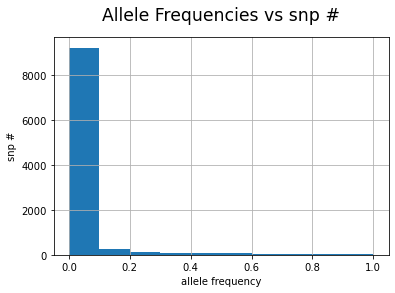

In [7]:
#making histogram of frequencies calculated above 
df_sum.hist()

#add x axis, y axis, and title labels 
plt.title('Allele Frequencies vs snp #', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('allele frequency')
plt.ylabel('snp #')

# exercise 3

In [8]:
#create new dataframe with data subset given parameters to find common variation
df_subset=df_sum.between(0.05, 0.95, inclusive=False)
df_subset

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [9]:
#create another new data frame with the subset of common variations and plot 
df_common= df_sum.loc[df_subset]

df_common

20      0.080259
32      0.595761
38      0.405612
41      0.094388
46      0.097527
          ...   
9957    0.841837
9959    0.115973
9974    0.180730
9975    0.810047
9980    0.077708
Length: 986, dtype: float64

Text(0, 0.5, 'snp #')

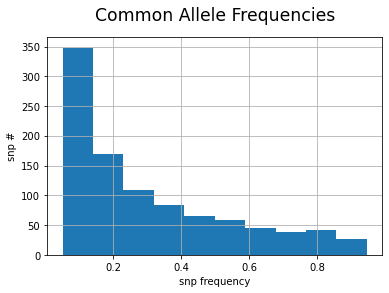

In [10]:
df_common.hist()
plt.title('Common Allele Frequencies', x=0.5, y=1.05, ha='center', fontsize='xx-large')
plt.xlabel('snp frequency')
plt.ylabel('snp #')

# exercise 4

In [11]:
df_rpkms

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
pca_input=df_iloc

In [13]:
pca_input = pca_input.T
pca_input

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
HG00096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00099,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG00101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NA21143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
pca_input.mean(axis = 0)

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64

In [15]:
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)

array([ 2.81174983e-16,  8.04062032e-16, -6.15742413e-16, ...,
       -3.13720792e-16, -1.76030043e-15,  8.90923477e-16])

In [16]:
#check variance
pca_input_standardized.var(axis = 0)

array([1., 1., 1., ..., 1., 1., 1.])

In [17]:
#do the PCA 
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[ -8.33942982, -10.42877121,  -2.51564272, ...,  -0.53542484,
          0.11820744,   0.07352318],
       [ -8.46123842, -10.32334888,  -5.29097582, ...,   0.90975909,
         -0.44814504,   0.13165788],
       [ -8.29420011,  -9.0238063 ,  -2.83561646, ...,  -0.33232557,
         -0.01102836,  -0.4943323 ],
       ...,
       [ -6.33274903,  -3.78073297,   7.0050536 , ...,  -0.40276213,
          0.8314971 ,  -0.02327748],
       [ -8.61492142,  -2.74358946,   8.75851544, ...,   0.55205192,
         -0.73161783,  -1.20777373],
       [ -6.07966909,  -1.78563179,   9.19581278, ...,   0.83225704,
         -0.3933297 ,  -0.41314206]])

In [18]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-8.339430,-10.428771,-2.515643,-0.320189,-5.233327,1.120818,0.905957,-0.535425,0.118207,0.073523
1,-8.461238,-10.323349,-5.290976,-0.253137,-2.999592,0.597832,0.040837,0.909759,-0.448145,0.131658
2,-8.294200,-9.023806,-2.835616,-0.714249,-4.504202,0.194967,0.512666,-0.332326,-0.011028,-0.494332
3,-7.921072,-9.075308,-5.269851,-0.212366,-2.845921,-0.029819,-0.288086,-0.902931,0.799605,-0.068600
4,-8.883854,-10.099714,-5.297779,0.430922,-0.653609,-0.235980,0.433881,-0.036609,-0.566781,0.033479
...,...,...,...,...,...,...,...,...,...,...
2543,-8.045113,-0.478128,8.882847,0.493754,3.461841,-0.343632,-1.242615,0.116685,0.913387,0.185136
2544,-8.438440,-3.946054,11.096259,0.265526,1.292093,-0.296802,-0.141813,-1.415455,0.122862,1.225245
2545,-6.332749,-3.780733,7.005054,0.803270,1.308720,-0.723472,-0.633316,-0.402762,0.831497,-0.023277
2546,-8.614921,-2.743589,8.758515,-0.124872,1.795572,-0.738480,0.282556,0.552052,-0.731618,-1.207774


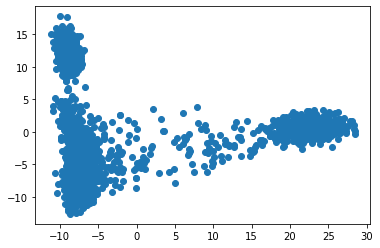

In [19]:
#plot data on PC1 and PC2
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])